<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-initialize-main-variables" data-toc-modified-id="Import-libraries-and-initialize-main-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and initialize main variables</a></span></li><li><span><a href="#Cleaning-data" data-toc-modified-id="Cleaning-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning data</a></span><ul class="toc-item"><li><span><a href="#Cleaning-AEMET-Data" data-toc-modified-id="Cleaning-AEMET-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cleaning AEMET Data</a></span></li><li><span><a href="#Cleaning-REE-Data" data-toc-modified-id="Cleaning-REE-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cleaning REE Data</a></span></li></ul></li><li><span><a href="#Electric-generation-features-analysis" data-toc-modified-id="Electric-generation-features-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Electric generation features analysis</a></span><ul class="toc-item"><li><span><a href="#Total-Generation" data-toc-modified-id="Total-Generation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Total Generation</a></span></li></ul></li><li><span><a href="#Weather-features-analysis" data-toc-modified-id="Weather-features-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weather features analysis</a></span><ul class="toc-item"><li><span><a href="#Precipitacions" data-toc-modified-id="Precipitacions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Precipitacions</a></span></li><li><span><a href="#Hours-of-sun" data-toc-modified-id="Hours-of-sun-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Hours of sun</a></span></li><li><span><a href="#Temperature" data-toc-modified-id="Temperature-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Temperature</a></span></li><li><span><a href="#Pressure" data-toc-modified-id="Pressure-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Pressure</a></span></li><li><span><a href="#Wind" data-toc-modified-id="Wind-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Wind</a></span></li></ul></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#Outlier-de-Precipitaciones" data-toc-modified-id="Outlier-de-Precipitaciones-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Outlier de Precipitaciones</a></span></li><li><span><a href="#Outliers-de-Temperatura-mínima" data-toc-modified-id="Outliers-de-Temperatura-mínima-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Outliers de Temperatura mínima</a></span></li><li><span><a href="#Outliers-de-Temperatura-máxima" data-toc-modified-id="Outliers-de-Temperatura-máxima-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Outliers de Temperatura máxima</a></span></li></ul></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Preprocesing" data-toc-modified-id="Preprocesing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Preprocesing</a></span><ul class="toc-item"><li><span><a href="#Encoder-for-REE-categorical-variables" data-toc-modified-id="Encoder-for-REE-categorical-variables-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Encoder for REE categorical variables</a></span></li></ul></li><li><span><a href="#Save-data-to-pickle" data-toc-modified-id="Save-data-to-pickle-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save data to pickle</a></span></li><li><span><a href="#Chart" data-toc-modified-id="Chart-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Chart</a></span><ul class="toc-item"><li><span><a href="#Save-data-of-Chart-to-pickle" data-toc-modified-id="Save-data-of-Chart-to-pickle-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Save data of Chart to pickle</a></span></li></ul></li></ul></div>

#  Import libraries and initialize main variables

- Lectura_AEMET_REE library have the code to import, clean and save the data reading by API´s from AEMET and REE.

- utils library have custom functions to create charts and clean and preprocesing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Lectura_AEMET_REE import Ingestion_AEMET,Ingestion_REE
from utils import limpieza, rellena_nulos_provincia, sns_generacion, target_preprocesing,chart_altair
import warnings

# customize some options.
pd.options.display.max_columns=None
plt.style.use('ggplot')
sns.set_palette("Set2")
sns.set_style("ticks")
warnings.filterwarnings("ignore")

# create objects from Lectura_AEMET_REE classes
Ing_AEMET=Ingestion_AEMET()
Ing_REE=Ingestion_REE()


# Cleaning data 

In [2]:
# Read weather and REE data from CSV
df_weather=Ing_AEMET.read_from_csv()
df_ree=Ing_REE.read_from_csv()

In [3]:
df_ree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82013 entries, 0 to 884
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       82011 non-null  float64
 1   percentage  82013 non-null  float64
 2   datetime    82013 non-null  object 
 3   title       82013 non-null  object 
 4   type        82013 non-null  object 
 5   system      82013 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.4+ MB


In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496491 entries, 0 to 496490
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fecha        496491 non-null  object
 1   indicativo   496491 non-null  object
 2   nombre       496491 non-null  object
 3   provincia    496491 non-null  object
 4   altitud      496491 non-null  object
 5   tmed         482761 non-null  object
 6   prec         482046 non-null  object
 7   tmin         482801 non-null  object
 8   horatmin     475564 non-null  object
 9   tmax         482905 non-null  object
 10  horatmax     475957 non-null  object
 11  dir          460982 non-null  object
 12  velmedia     464039 non-null  object
 13  racha        460989 non-null  object
 14  horaracha    460964 non-null  object
 15  sol          275767 non-null  object
 16  presMax      370542 non-null  object
 17  horaPresMax  370534 non-null  object
 18  presMin      370548 non-null  object
 19  ho

## Cleaning AEMET Data

Weather data is broken down by day,province and station, it have to be grouped by day and electrical system.

To do this, first the data is added by province obtaining the maximum, minimum and average (depending of the variable) and then it´s made the average of the provinces of each system.

Also I delete the following variables:

    -altitud: this is a constant value, so is not meaningful.
    -horaPresMax,horaPresMin,horaracha,horatmin,horatmax: The REE date is grouped by day , so this is not necessary.
    -dir: it is not possible to get a real average of direction of the wind with the weather data from AEMET for a electric system
    
    


In [5]:
# Drop unused columns, this columns are dropped because their info is not meaningful for our models
df_weather.drop(columns=['altitud','horaPresMax','horaPresMin','horaracha','dir','horatmin','horatmax'],inplace=True)

# execute limpieza function from utils to convert columns to numbers by replace ',' for '.'
df_weather=limpieza(df_weather,df_weather.columns[4:13])
df_weather.head()

,fecha,indicativo,nombre,provincia,tmed,prec,tmin,tmax,velmedia,racha,sol,presMax,presMin,Holiday,weekday
0,2016-01-01,0252D,ARENYS DE MAR,BARCELONA,11.2,0.2,7.8,14.7,1.7,7.2,NaN,NaN,NaN,1,4
1,2016-01-02,0252D,ARENYS DE MAR,BARCELONA,11.8,0.0,7.5,16.1,1.1,9.7,NaN,NaN,NaN,0,5
2,2016-01-03,0252D,ARENYS DE MAR,BARCELONA,10.0,0.0,5.8,14.1,1.9,9.2,NaN,NaN,NaN,0,6
3,2016-01-04,0252D,ARENYS DE MAR,BARCELONA,11.6,0.9,8.0,15.3,0.8,8.9,NaN,NaN,NaN,0,0
4,2016-01-05,0252D,ARENYS DE MAR,BARCELONA,9.9,0.1,5.6,14.2,2.5,8.6,NaN,NaN,NaN,1,1


rellena_nulos_provincia get the max, med and min of each list of variables grouped by province. This is to finally get the values grouped by electric system

In [6]:
df_weather_group=rellena_nulos_provincia(df_weather,['tmax','presMax','racha'],['tmin','presMin'],['prec','tmed','sol','velmedia'])

In [7]:
electric_systems={
    'STA. CRUZ DE TENERIFE':'canarias',
    'LAS PALMAS':'canarias',
    'ILLES BALEARS':'baleares',
    'CEUTA':'ceuta',
    'MELILLA':'melilla'}

# Now each provincia have the same weigth in the DataFrame, we need to group by electric system

# assign a electric system for each row and then grouped by system
df_weather_group['system']=[electric_systems[l.upper()]  
                      if l.upper() in electric_systems.keys() else 'peninsular' 
                      for l in df_weather_group['provincia'] ]


weather_grouped=df_weather_group.groupby(['fecha','system','Holiday','weekday'],as_index=False)
df_weather_system=weather_grouped.mean(['tmed','prec','tmin','tmax','velmedia','sol','presMax','presMin','racha'])
df_weather_system.fillna(0,inplace=True)
df_weather_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10035 entries, 0 to 10034
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     10035 non-null  object 
 1   system    10035 non-null  object 
 2   Holiday   10035 non-null  object 
 3   weekday   10035 non-null  object 
 4   tmin      10035 non-null  float64
 5   presMin   10035 non-null  float64
 6   prec      10035 non-null  float64
 7   tmed      10035 non-null  float64
 8   sol       10035 non-null  float64
 9   velmedia  10035 non-null  float64
 10  tmax      10035 non-null  float64
 11  presMax   10035 non-null  float64
 12  racha     10035 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.1+ MB


## Cleaning REE Data

In [8]:
# First of all, take only the data from systems with 'Renovable' energy
Renovable_system=pd.unique(df_ree[df_ree['type']=='Renovable']['system'])
df_ree_renov=df_ree[df_ree['system'].isin(Renovable_system)]

In [9]:
df_ree_renov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77847 entries, 0 to 884
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       77845 non-null  float64
 1   percentage  77847 non-null  float64
 2   datetime    77847 non-null  object 
 3   title       77847 non-null  object 
 4   type        77847 non-null  object 
 5   system      77847 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.2+ MB


In [10]:
# Rename columns
df_ree_renov.rename(columns={'value':'Generacion_Mwh','title':'Tecnologia','type':'Renov_norenov'},inplace=True)

# Drop percentage columns.
df_ree_renov.drop(columns=['percentage'],inplace=True)

# fill na value with 0 for generation
df_ree_renov['Generacion_Mwh']=df_ree_renov['Generacion_Mwh'].fillna(0).astype(float)

# Put date in a shorter format and delete na
df_ree_renov['fecha']=df_ree_renov['datetime'].str[:10]
df_ree_renov=df_ree_renov[~df_ree_renov['fecha'].isna()]
df_ree_renov.drop(columns=['datetime'],inplace=True)
df_ree_renov.head()

,Generacion_Mwh,Tecnologia,Renov_norenov,system,fecha
0,29281.000,Hidráulica,Renovable,peninsular,2016-01-01
1,35544.881,Hidráulica,Renovable,peninsular,2016-01-02
2,35910.705,Hidráulica,Renovable,peninsular,2016-01-03
3,65268.886,Hidráulica,Renovable,peninsular,2016-01-04
4,79718.832,Hidráulica,Renovable,peninsular,2016-01-05


# Electric generation features analysis

Electric generation is our target, so plot the data to be sure of the data we have. In this case the values from the months of the covid lockdown are going to be deleted to, to not introduce noise in the models.


## Total Generation

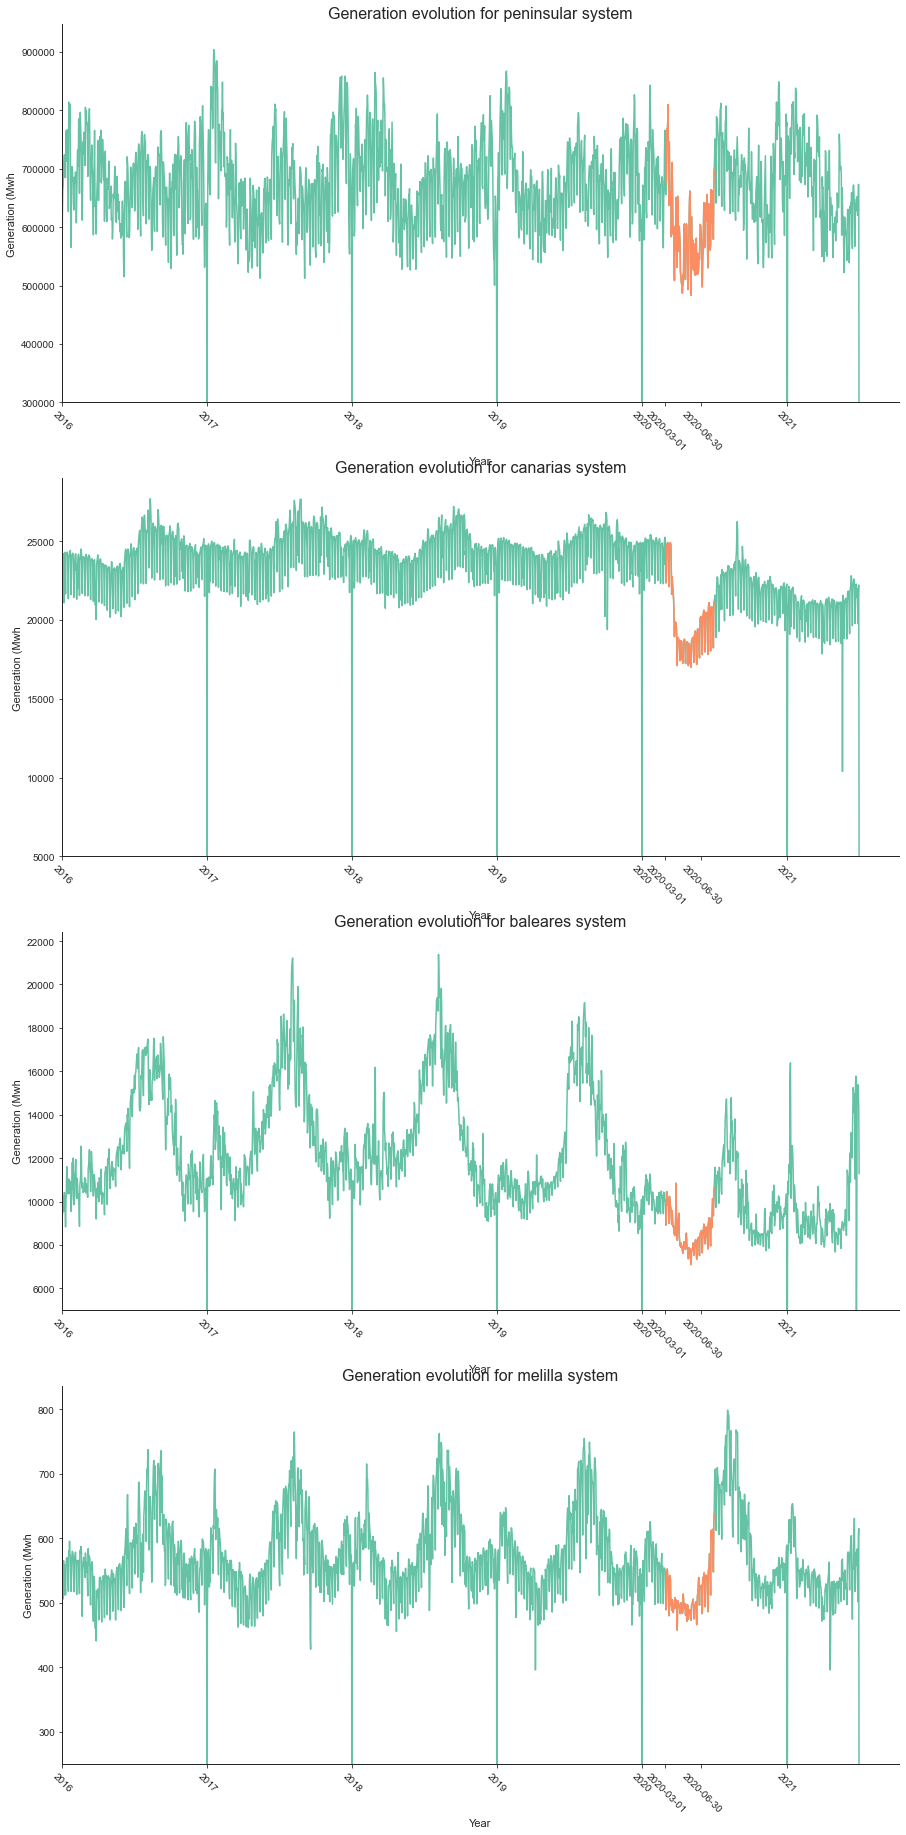

In [11]:
sns_generacion(df_ree_renov,['Generación total'],Renovable_system,'2020-03-01','2020-06-30')

It can be seen how the temporality for the baleares and melilla systemss very strong, while for the peninsular and the canarias systems it is much lower, so the date is going to be a important feature in our model.

In addition, the decrease in electricity generation is clearly seen for the period of COVID-19 lockdown

For than I delete the date from 2021-03-15 to 2021-06-28 due to covid lockdown

In [12]:
df_ree_filtered=df_ree_renov[(df_ree_renov['fecha']<'2020-03-15') | (df_ree_renov['fecha']>='2020-06-28')]

# Weather features analysis

First of all, I do a pairplot chart to compare all the variables, and see its relationships

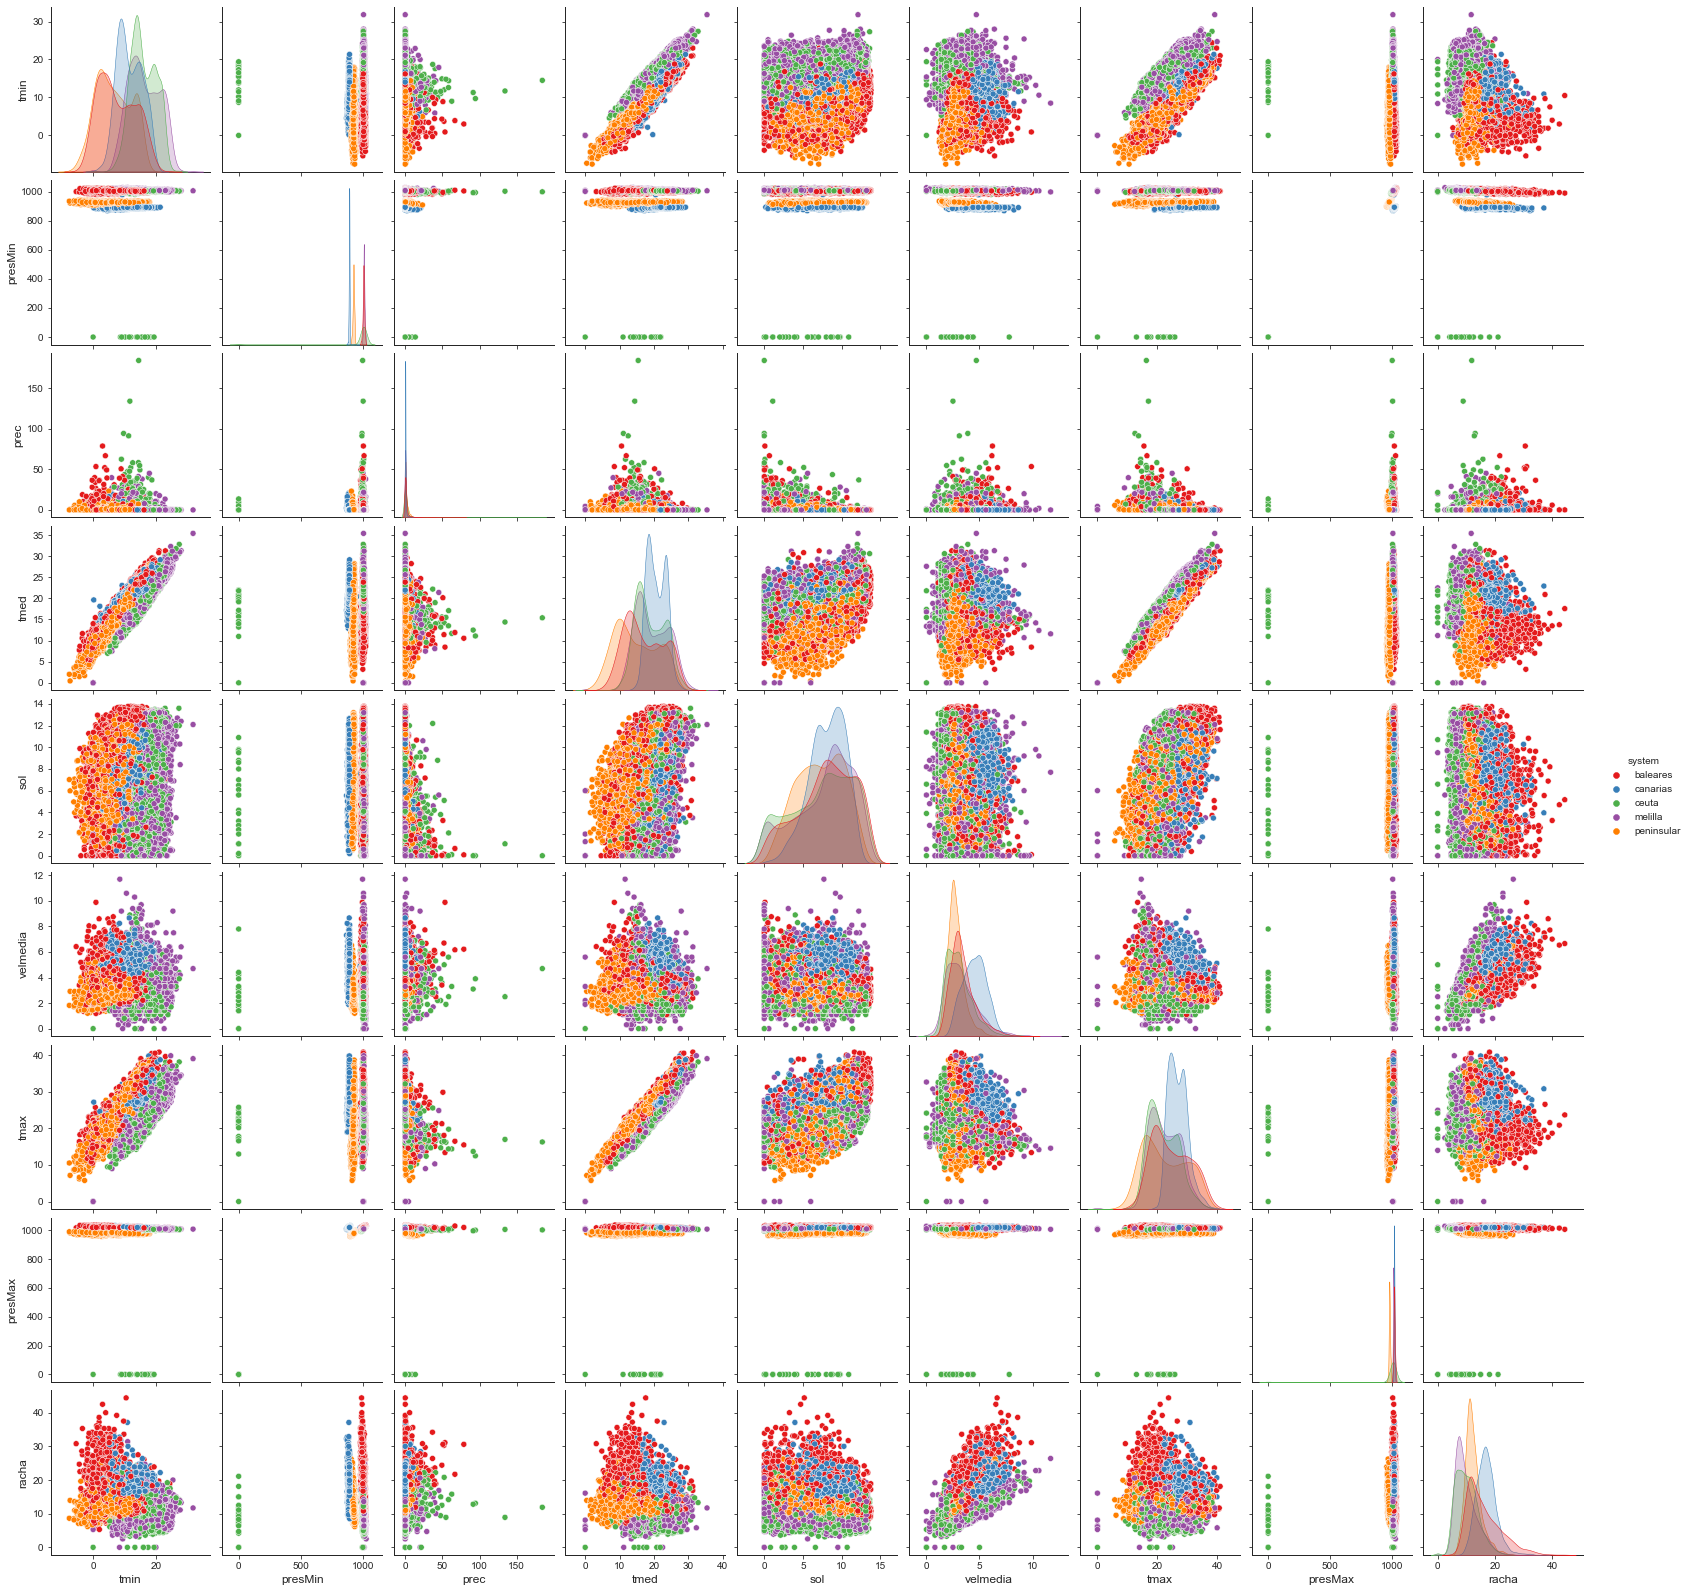

In [13]:
sns.pairplot(data=df_weather_system,hue='system');

We see that there are a strong correlation between tmax,tmin and tmed, also we can appreciate that there are a lot of 0 values for Ceuta

## Precipitacions

In [14]:
# All the data is near 0, with some extreme values. This is normal more of days doesn't rain.
df_weather_system['prec'].describe()

count    10035.000000
mean         1.333717
std          4.960016
min          0.000000
25%          0.000000
50%          0.000000
75%          0.460556
max        184.400000
Name: prec, dtype: float64

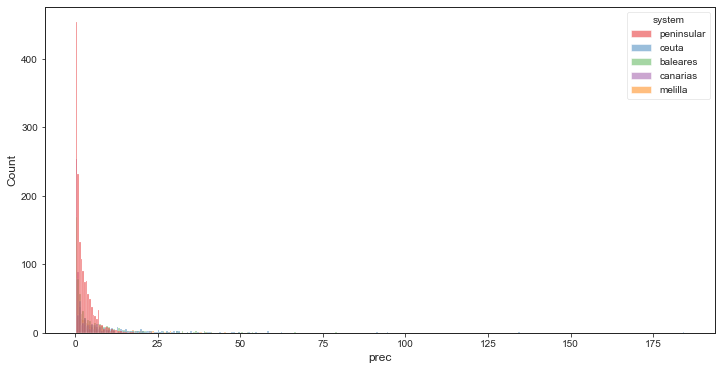

In [15]:
# All the info is near 0, so I use a histogram to see the distribution of prec, filtering by prec>0.1
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.histplot(data=df_weather_system[df_weather_system['prec']>0.1],x='prec',hue='system',alpha=0.5);

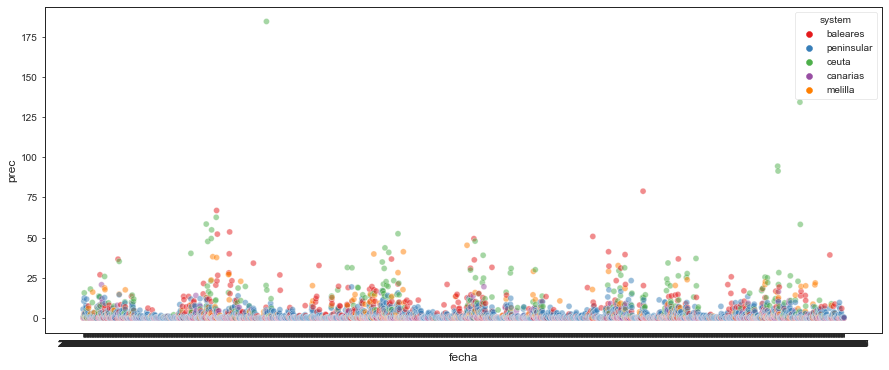

In [16]:
# To explore the data, use a scatterplot without 0 values, there is a outlier for Cueta.
f,ax=plt.subplots(1,1)
f.set_size_inches(15,6)
ax=sns.scatterplot(data=df_weather_system[df_weather_system['prec']>0],y='prec',x='fecha',hue='system',alpha=0.5);

## Hours of sun

In [17]:
df_weather_system['sol'].describe()

count    10035.000000
mean         7.663463
std          3.369229
min          0.000000
25%          5.400000
50%          8.100000
75%         10.265728
max         13.783333
Name: sol, dtype: float64

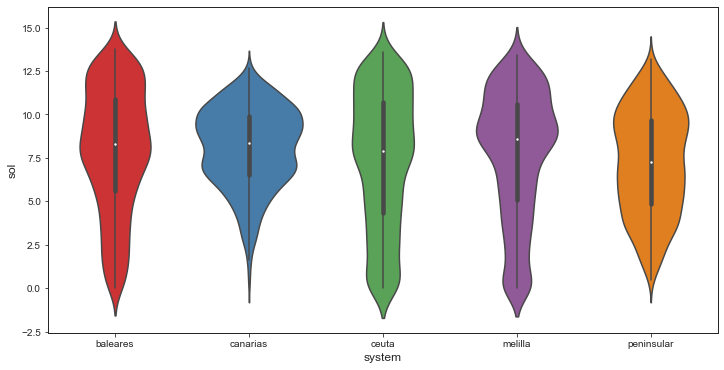

In [18]:
# Use a violinplot to see the distribution. 
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='sol', data=df_weather_system);

## Temperature

In [19]:
df_weather_system['tmax'].describe()

count    10035.000000
mean        23.611242
std          5.859658
min          0.000000
25%         18.900000
50%         23.700000
75%         27.920213
max         40.900000
Name: tmax, dtype: float64

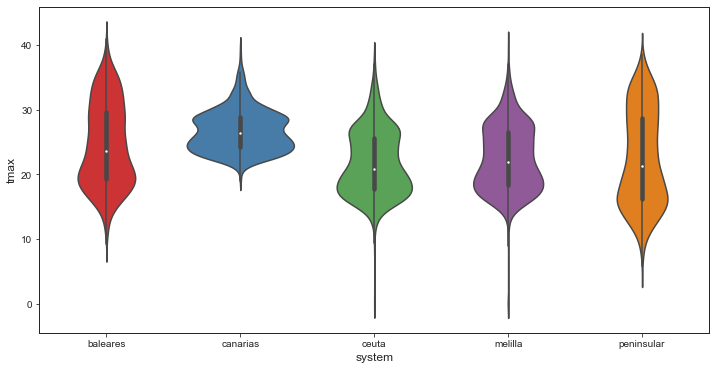

In [20]:
# Use a violinplot to see the distribution. 
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='tmax', data=df_weather_system);

In [21]:
df_weather_system['tmin'].describe()

count    10035.000000
mean        11.525509
std          6.349626
min         -7.570213
25%          7.250000
50%         12.100000
75%         15.800000
max         31.800000
Name: tmin, dtype: float64

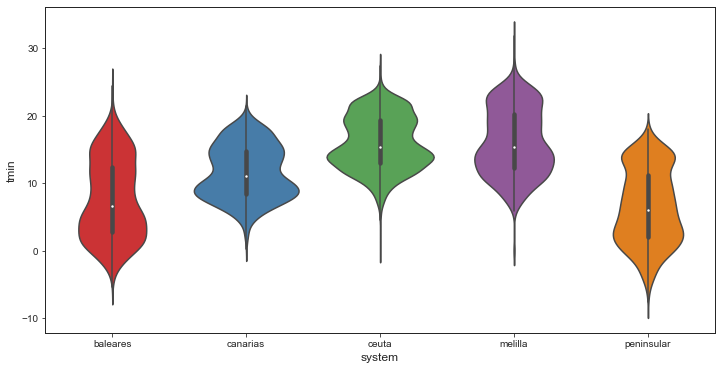

In [22]:
#Use a violinplot to see the distribution. Similar to tmax
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='tmin', data=df_weather_system);

## Pressure

In [23]:
df_weather_system['presMin'].describe()

count    10035.000000
mean       964.493850
std         69.659383
min          0.000000
25%        920.623404
50%       1001.600000
75%       1007.800000
max       1027.800000
Name: presMin, dtype: float64

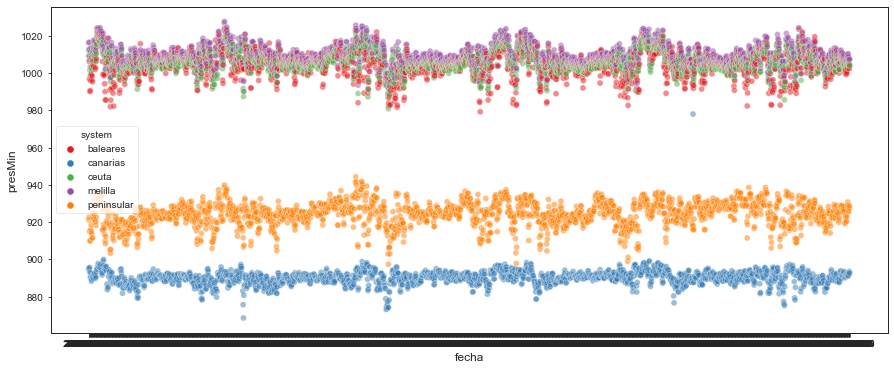

In [24]:
# To explore the data, use a scatterplot without 0 values
f,ax=plt.subplots(1,1)
f.set_size_inches(15,6)
ax=sns.scatterplot(data=df_weather_system[df_weather_system['presMin']>0],y='presMin',x='fecha',hue='system',alpha=0.5);

In [25]:
df_weather_system['presMax'].describe()

count    10035.000000
mean      1005.888524
std         52.561714
min          0.000000
25%       1005.600000
50%       1013.300000
75%       1018.650000
max       1037.000000
Name: presMax, dtype: float64

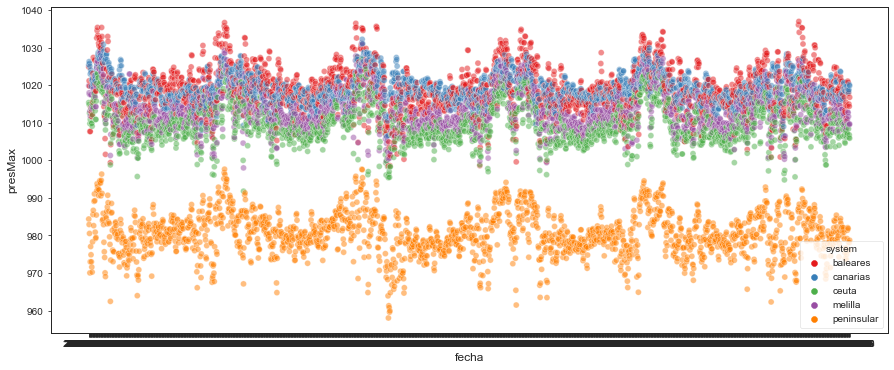

In [26]:
# To explore the data, use a scatterplot without 0 values
f,ax=plt.subplots(1,1)
f.set_size_inches(15,6)
ax=sns.scatterplot(data=df_weather_system[df_weather_system['presMax']>0],y='presMax',x='fecha',hue='system',alpha=0.5);

## Wind

In [27]:
df_weather_system['velmedia'].describe()

count    10035.000000
mean         3.395777
std          1.335122
min          0.000000
25%          2.470000
50%          3.100000
75%          4.200000
max         11.700000
Name: velmedia, dtype: float64

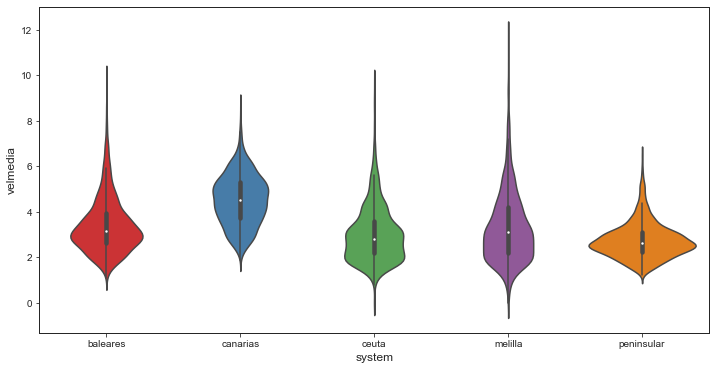

In [28]:
#Use a violinplot to see the distribution.
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='velmedia', data=df_weather_system);

In [29]:
df_weather_system['racha'].describe()

count    10035.000000
mean        12.997583
std          5.029623
min          0.000000
25%          9.531915
50%         12.200000
75%         16.000000
max         44.400000
Name: racha, dtype: float64

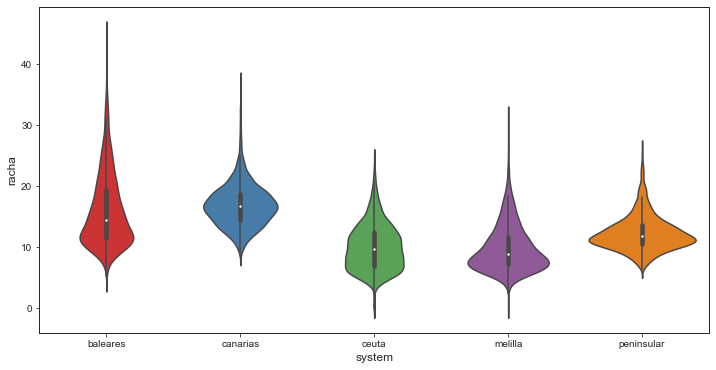

In [30]:
#Use a violinplot to see the distribution. Similar to velmedia
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='racha', data=df_weather_system);

# Outliers

We are going to look for the outliers of precipitation and minimum temperature, in case they were erroneous data.



## Outlier de Precipitaciones


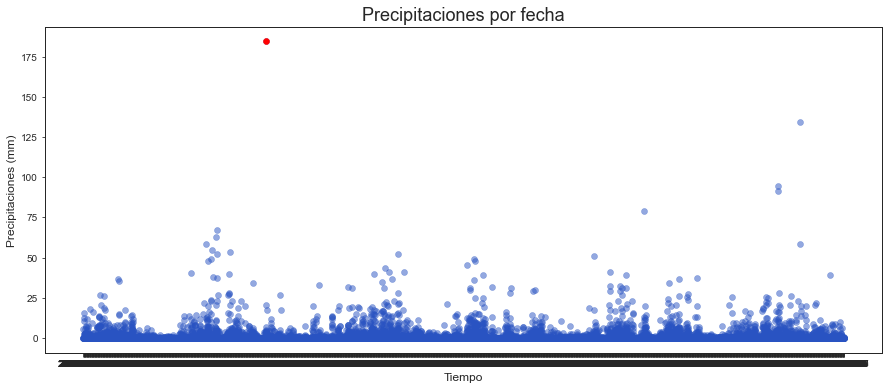

In [31]:
# Paint all the date in a scatter plot , and in red the outlier
maxprec_mm=df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]['prec']
maxprec_fec=df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]['fecha']
plt.figure(figsize=(15,6))
plt.scatter(df_weather_system['fecha'],df_weather_system['prec'],c='#2953C2',alpha=0.5)
plt.scatter(maxprec_fec,maxprec_mm,c='r')
plt.title('Precipitaciones por fecha',fontsize=18)
plt.xlabel('Tiempo')
plt.ylabel('Precipitaciones (mm)')
plt.minorticks_off();


In [32]:
# I check that this is data is ok, against newspapers and aemet website
df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
2417,2017-04-28,ceuta,0,4,14.5,998.7,184.4,15.4,0.0,4.7,16.3,1002.7,11.9


## Outliers de Temperatura mínima

On 08-02-2020 we have a maximum data in the historical series of minimum temperatures of 31.8 degrees in the MELILLA station

In [33]:
tminGrouped=df_weather_system.groupby('fecha')['tmin'].mean().reset_index()
maxtmin_celsius=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]['tmin']
maxtmin_fec=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]['fecha']
mintmin_celsius=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]['tmin']
mintmin_fec=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]['fecha']

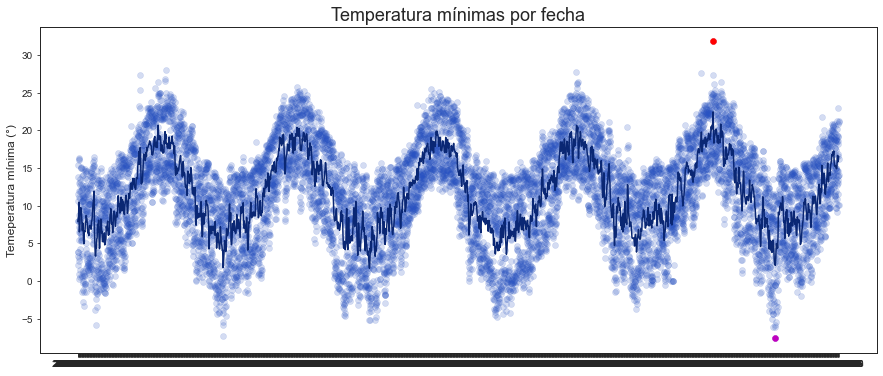

In [34]:
# Paint all the date in a scatter plot , and in red the max outlier and in purple the min outlier, also add in dark blue the mean.
plt.figure(figsize=(15,6))
plt.plot(tminGrouped['fecha'],tminGrouped['tmin'],c='#0A2774')
plt.scatter(df_weather_system['fecha'],df_weather_system['tmin'],c='#2953C2',alpha=0.2)
plt.scatter(maxtmin_fec,maxtmin_celsius,c='r')
plt.scatter(mintmin_fec,mintmin_celsius,c='m')
plt.title('Temperatura mínimas por fecha',fontsize=18)
plt.ylabel('Tiempo')
plt.ylabel('Temeperatura mínima (°)');



In [35]:
# I check that this is data is ok, against newspapers and aemet website
df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
8378,2020-08-02,melilla,0,6,31.8,1005.7,0.0,35.4,12.1,4.7,39.1,1008.3,11.7


In [36]:
# This data is for filomena, so it´s OK
df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
9194,2021-01-12,peninsular,0,1,-7.570213,934.265957,0.022589,2.028098,7.022181,1.819685,10.544681,989.948936,8.634043


## Outliers de Temperatura máxima

In [37]:
tmaxGrouped=df_weather_system.groupby('fecha')['tmax'].mean().reset_index()
maxtmax_celsius=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]['tmax']
maxtmax_fec=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]['fecha']
mintmax_celsius=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]['tmax']
mintmax_fec=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]['fecha']

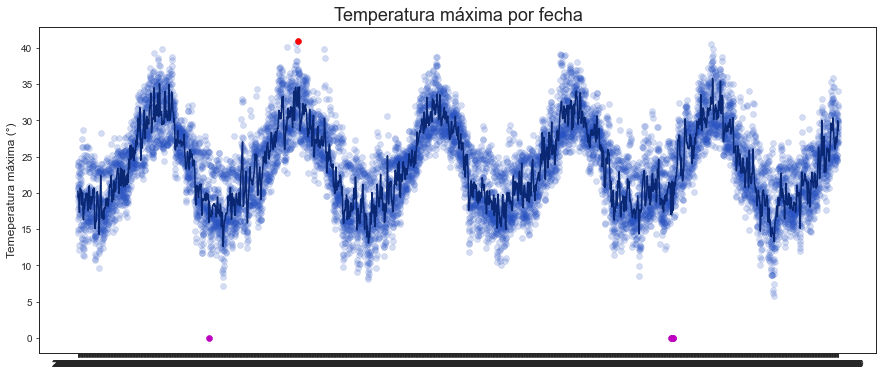

In [38]:
# Paint all the date in a scatter plot , and in red the max outlier and in purple the min outlier, also add in dark blue the mean.
plt.figure(figsize=(15,6))
plt.plot(tmaxGrouped['fecha'],tmaxGrouped['tmax'],c='#0A2774')
plt.scatter(df_weather_system['fecha'],df_weather_system['tmax'],c='#2953C2',alpha=0.2)
plt.scatter(maxtmax_fec,maxtmax_celsius,c='r')
plt.scatter(mintmax_fec,mintmax_celsius,c='m')
plt.title('Temperatura máxima por fecha',fontsize=18)
plt.ylabel('Tiempo')
plt.ylabel('Temeperatura máxima (°)');


In [39]:
#It´s ok, it´s not a rare data
df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
2900,2017-08-03,baleares,0,3,21.0,1003.6,0.0,31.28,11.633333,2.77,40.9,1016.4,18.1


In [40]:
# This are date, where the info it´s not reading.
df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
1732,2016-12-12,ceuta,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7823,2020-04-13,melilla,0,0,0.0,1001.9,1.0,0.0,2.0,1.9,0.0,1005.6,6.4
7833,2020-04-15,melilla,0,2,0.0,1004.5,0.0,0.0,6.0,3.3,0.0,1011.8,8.1
7843,2020-04-17,melilla,0,4,0.0,1008.4,0.0,0.0,0.0,2.2,0.0,1010.8,6.1
7848,2020-04-18,melilla,0,5,0.0,1004.9,4.4,0.0,0.0,1.9,0.0,1009.1,5.3
7853,2020-04-19,melilla,0,6,0.0,1001.7,0.4,0.0,1.3,5.6,0.0,1006.2,16.1


# Correlation Matrix

In [41]:
features_columns=['Holiday','weekday','tmin','tmed','tmax','prec','sol','velmedia','racha','presMax','presMin']
df_Matrix_Corr=df_weather_system[features_columns].corr()

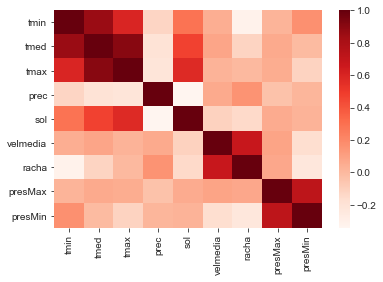

In [42]:
sns.heatmap(df_Matrix_Corr,cmap='Reds');

In [43]:
df_Matrix_Corr

,tmin,tmed,tmax,prec,sol,velmedia,racha,presMax,presMin
tmin,1.000000,0.861988,0.599287,-0.121969,0.289334,0.049180,-0.312578,0.024384,0.168243
tmed,0.861988,1.000000,0.908902,-0.190710,0.475533,0.086382,-0.118868,0.063821,-0.002333
tmax,0.599287,0.908902,1.000000,-0.212935,0.579611,0.027180,0.000106,0.052637,-0.111720
prec,-0.121969,-0.190710,-0.212935,1.000000,-0.340907,0.062697,0.159509,-0.035412,0.018408
sol,0.289334,0.475533,0.579611,-0.340907,1.000000,-0.105294,-0.145161,0.057608,0.028025
velmedia,0.049180,0.086382,0.027180,0.062697,-0.105294,1.000000,0.684184,0.093417,-0.167197
racha,-0.312578,-0.118868,0.000106,0.159509,-0.145161,0.684184,1.000000,0.074801,-0.226019
presMax,0.024384,0.063821,0.052637,-0.035412,0.057608,0.093417,0.074801,1.000000,0.725362
presMin,0.168243,-0.002333,-0.111720,0.018408,0.028025,-0.167197,-0.226019,0.725362,1.000000


# Preprocesing 


In [44]:
df_ree=df_ree_filtered[df_ree_filtered['Renov_norenov']!='Generación total']
df_ree['Generacion_Mwh']=df_ree['Generacion_Mwh'].astype(float)

In [45]:
df_ree_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73791 entries, 0 to 884
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Generacion_Mwh  73791 non-null  float64
 1   Tecnologia      73791 non-null  object 
 2   Renov_norenov   73791 non-null  object 
 3   system          73791 non-null  object 
 4   fecha           73791 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [46]:
df_ree.reset_index(inplace=True,drop=True) #to join by index before encoding

In [47]:
df_weather_system['Holiday']=df_weather_system['Holiday'].astype(int)
df_weather_system['weekday']=df_weather_system['weekday'].astype(int)

In [48]:
df_weather_system['year']=df_weather_system['fecha'].str.slice(0,4).astype(int)
df_weather_system['month']=df_weather_system['fecha'].str.slice(5,7).astype(int)
df_weather_system['day']=df_weather_system['fecha'].str.slice(8,10).astype(int)

## Encoder for REE categorical variables

In [49]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder().fit(df_ree[['Tecnologia','Renov_norenov']])

df_transform=enc.transform(df_ree[['Tecnologia','Renov_norenov']])

df_onehot =  pd.DataFrame(df_transform.todense(), columns= enc.get_feature_names())

df_ree_onehot=pd.merge(df_ree[['Generacion_Mwh','fecha','system']],df_onehot,how='inner',left_index=True,right_index=True)

In [50]:
df_ree_onehot.head()

,Generacion_Mwh,fecha,system,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,29281.000,2016-01-01,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35544.881,2016-01-02,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,35910.705,2016-01-03,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,65268.886,2016-01-04,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,79718.832,2016-01-05,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
target_percentage=enc.get_feature_names()

df_ree_target=target_preprocesing(df_ree_onehot,target_percentage, ['system'])

In [52]:
df_ree_target.head()

,system,fecha,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,baleares,2016-01-01,8814.678,0.343993,0.258372,0.007846,0.001254,0.0,0.0,0.0,0.115979,0.0,0.000155,0.055027,0.055027,0.016359,0.0,0.145988,0.0,0.0,0.927205,0.072795
1,baleares,2016-01-02,9435.611,0.346457,0.257906,0.009564,0.002847,0.0,0.0,0.0,0.126039,0.0,0.000247,0.048582,0.048582,0.020613,0.0,0.139162,0.0,0.0,0.927710,0.072290
2,baleares,2016-01-03,9497.967,0.368112,0.245120,0.009788,0.001577,0.0,0.0,0.0,0.124939,0.0,0.000000,0.048558,0.048558,0.011936,0.0,0.141412,0.0,0.0,0.937929,0.062071
3,baleares,2016-01-04,10236.225,0.329239,0.283662,0.012230,0.000843,0.0,0.0,0.0,0.134589,0.0,0.000312,0.044277,0.044277,0.005257,0.0,0.145313,0.0,0.0,0.949311,0.050689
4,baleares,2016-01-05,10213.430,0.317729,0.288860,0.012368,0.001129,0.0,0.0,0.0,0.126170,0.0,0.000429,0.047413,0.047413,0.010349,0.0,0.148140,0.0,0.0,0.940681,0.059319


In [53]:
df_ree_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7612 entries, 0 to 7611
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   system                     7612 non-null   object 
 1   fecha                      7612 non-null   object 
 2   Generacion_Mwh             7612 non-null   float64
 3   x0_Carbón                  7612 non-null   float64
 4   x0_Ciclo combinado         7612 non-null   float64
 5   x0_Cogeneración            7612 non-null   float64
 6   x0_Eólica                  7612 non-null   float64
 7   x0_Fuel + Gas              7612 non-null   float64
 8   x0_Hidroeólica             7612 non-null   float64
 9   x0_Hidráulica              7612 non-null   float64
 10  x0_Motores diésel          7612 non-null   float64
 11  x0_Nuclear                 7612 non-null   float64
 12  x0_Otras renovables        7612 non-null   float64
 13  x0_Residuos no renovables  7612 non-null   float

In [54]:
df_weather_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10035 entries, 0 to 10034
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     10035 non-null  object 
 1   system    10035 non-null  object 
 2   Holiday   10035 non-null  int32  
 3   weekday   10035 non-null  int32  
 4   tmin      10035 non-null  float64
 5   presMin   10035 non-null  float64
 6   prec      10035 non-null  float64
 7   tmed      10035 non-null  float64
 8   sol       10035 non-null  float64
 9   velmedia  10035 non-null  float64
 10  tmax      10035 non-null  float64
 11  presMax   10035 non-null  float64
 12  racha     10035 non-null  float64
 13  year      10035 non-null  int32  
 14  month     10035 non-null  int32  
 15  day       10035 non-null  int32  
dtypes: float64(9), int32(5), object(2)
memory usage: 1.4+ MB


In [55]:
df_ree_weather=pd.merge(df_weather_system,
                            df_ree_target, 
                             on=['fecha','system'])

In [56]:
df_ree_weather.head(10)

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,year,month,day,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,2016-01-01,baleares,1,4,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,2016,1,1,8814.678,0.343993,0.258372,0.007846,0.001254,0.0,0.000000,0.000000,0.115979,0.000000,0.000155,0.055027,0.055027,0.016359,0.000000,0.145988,0.000000,0.000000,0.927205,0.072795
1,2016-01-01,canarias,1,4,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,2016,1,1,20220.015,0.000000,0.352333,0.000000,0.018968,0.0,0.000584,0.000453,0.298062,0.000000,0.001335,0.000000,0.000000,0.034486,0.000000,0.007941,0.285837,0.000000,0.944174,0.055826
2,2016-01-01,melilla,1,4,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,2016,1,1,479.011,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.933300,0.000000,0.000000,0.033199,0.033199,0.000303,0.000000,0.000000,0.000000,0.000000,0.966499,0.033501
3,2016-01-01,peninsular,1,4,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,2016,1,1,537090.081,0.045432,0.090214,0.078047,0.371330,0.0,0.000000,0.054518,0.000000,0.303013,0.013348,0.007165,0.002196,0.015230,0.001295,0.000000,0.000000,0.018213,0.542084,0.457916
4,2016-01-02,baleares,0,5,3.900000,1006.400000,0.000000,13.588889,3.140000,4.488889,20.700000,1021.200000,23.300000,2016,1,2,9435.611,0.346457,0.257906,0.009564,0.002847,0.0,0.000000,0.000000,0.126039,0.000000,0.000247,0.048582,0.048582,0.020613,0.000000,0.139162,0.000000,0.000000,0.927710,0.072290
5,2016-01-02,canarias,0,5,8.000000,895.150000,0.000000,18.325000,9.000000,3.068889,23.900000,1026.300000,10.150000,2016,1,2,22942.014,0.000000,0.332830,0.000000,0.016753,0.0,0.000592,0.000420,0.280632,0.000000,0.001153,0.000000,0.000000,0.030013,0.000000,0.017682,0.319924,0.000000,0.951068,0.048932
6,2016-01-02,melilla,0,5,11.600000,1016.400000,0.000000,17.000000,7.900000,2.500000,22.400000,1018.000000,9.700000,2016,1,2,520.350,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.939485,0.000000,0.000000,0.030119,0.030119,0.000277,0.000000,0.000000,0.000000,0.000000,0.969604,0.030396
7,2016-01-02,peninsular,0,5,2.136170,922.636170,0.791592,8.648970,4.436543,3.055813,14.544681,982.923404,14.508511,2016,1,2,619096.702,0.046522,0.074666,0.085865,0.380221,0.0,0.000000,0.057414,0.000000,0.273971,0.012676,0.006618,0.001840,0.018983,0.002035,0.000000,0.000000,0.039188,0.526831,0.473169
8,2016-01-03,baleares,0,6,2.700000,996.900000,0.833333,10.711111,0.800000,4.444444,17.800000,1019.800000,26.100000,2016,1,3,9497.967,0.368112,0.245120,0.009788,0.001577,0.0,0.000000,0.000000,0.124939,0.000000,0.000000,0.048558,0.048558,0.011936,0.000000,0.141412,0.000000,0.000000,0.937929,0.062071
9,2016-01-03,canarias,0,6,8.800000,895.650000,0.005000,18.271111,8.775000,3.071111,23.700000,1025.900000,11.250000,2016,1,3,22186.025,0.000000,0.341117,0.000000,0.024019,0.0,0.000943,0.000437,0.284953,0.000000,0.001234,0.000000,0.000000,0.031254,0.000000,0.012332,0.303712,0.000000,0.942114,0.057886


In [57]:
df_ree_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7608 entries, 0 to 7607
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha                      7608 non-null   object 
 1   system                     7608 non-null   object 
 2   Holiday                    7608 non-null   int32  
 3   weekday                    7608 non-null   int32  
 4   tmin                       7608 non-null   float64
 5   presMin                    7608 non-null   float64
 6   prec                       7608 non-null   float64
 7   tmed                       7608 non-null   float64
 8   sol                        7608 non-null   float64
 9   velmedia                   7608 non-null   float64
 10  tmax                       7608 non-null   float64
 11  presMax                    7608 non-null   float64
 12  racha                      7608 non-null   float64
 13  year                       7608 non-null   int32

# Save data to pickle

In [58]:
df_ree_weather.to_pickle(Ing_AEMET.path_Data+"2_Wheater_ree.pkl")

# Chart

In [59]:
df_ree_filtered.reset_index(inplace=True,drop=True)

In [60]:
df_renov=df_ree_filtered.groupby(['fecha','system','Renov_norenov'],as_index=False)['Generacion_Mwh'].sum()
df_renov=df_renov[df_renov['Renov_norenov']=='Renovable']
df_renov['Tecnologia']='Renovable'
df_renov.reset_index(inplace=True,drop=True)

In [61]:
df_renov_roll=df_renov.groupby(['system','Tecnologia','Renov_norenov'])['Generacion_Mwh'].rolling(7,7).mean().reset_index()
df_renov_roll.set_index('level_3',inplace=True)

In [62]:
df_renov_roll=pd.merge(df_renov[['fecha']],df_renov_roll,how='left',left_index=True,right_index=True)
df_renov_roll[df_renov_roll['system']=='peninsular'].tail()

,fecha,system,Tecnologia,Renov_norenov,Generacion_Mwh
7595,2021-06-26,peninsular,Renovable,Renovable,335750.878571
7599,2021-06-27,peninsular,Renovable,Renovable,329708.542857
7603,2021-06-28,peninsular,Renovable,Renovable,329212.035714
7607,2021-06-29,peninsular,Renovable,Renovable,326727.442857
7611,2021-06-30,peninsular,Renovable,Renovable,282356.971429


In [63]:
df_rolling=df_ree_filtered.groupby(['system','Tecnologia','Renov_norenov'])['Generacion_Mwh'].rolling(7,7).mean().reset_index()
df_rolling.set_index('level_3',inplace=True)

In [64]:
df_rolling=pd.merge(df_ree_filtered[['fecha']],df_rolling,how='left',left_index=True,right_index=True)
df_rolling[df_rolling['system']=='peninsular'].tail()

,fecha,system,Tecnologia,Renov_norenov,Generacion_Mwh
69183,2021-06-26,peninsular,Generación total,Generación total,634385.771429
69184,2021-06-27,peninsular,Generación total,Generación total,636388.300000
69185,2021-06-28,peninsular,Generación total,Generación total,641010.871429
69186,2021-06-29,peninsular,Generación total,Generación total,647510.400000
69187,2021-06-30,peninsular,Generación total,Generación total,565158.785714


In [65]:
df_rolling=df_rolling.append(df_renov_roll)
df_rolling['year']=' '+df_rolling['fecha'].str.slice(0,4)

## Save data of Chart to pickle

In [67]:
df_rolling.to_pickle(Ing_AEMET.path_Data+"2_Rolling_chart.pkl")